<a href="https://colab.research.google.com/github/amirrezaahmadnejad/DNN/blob/master/1_Deep_Learning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning, in the context of machine learning, describes an automatic search
process for better representations.Machine-learning algorithms aren’t usually creative in finding these transformations; they’re merely searching through a predefined set of operations, called a hypothesis space.

what deep learning is, technically: a multistage way to learn data representations. It’s a simple idea—but, as it turns out, very simple mechanisms, sufficiently scaled, can end up looking like magic.
![](https://drive.google.com/open?id=1huRRemQQ76xDQpHtRka25H86kphkd9cW)















**learn to classify handwritten digits**

In [0]:
!pip install tensorflow==1.14.0 #Down grade tensorflow beacue now it is on 2 version
import tensorflow as tf


In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9. The images and labels have a one-to-one correspondence.
Now what we do:
First, we’ll feed the neural network the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for test_images, and we’ll
verify whether these predictions match the labels from test_labels.

In [0]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.
To make the network ready for training, we need to pick three more things, as part of the compilation step:


*   **A loss function**—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
*   **An optimizer**—The mechanism through which the network will update itself
based on the data it sees and its loss function.
*   **Metrics** to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# categorically encode the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Ready to train the network, which in Keras is done via a call to the network’s fit method—we fit the model to its training data:

In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Two quantities are displayed during training: **the loss of the network over the training data**, and **the accuracy of the network over the training data.**
Now let’s check that the model performs well on the test set, too:

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

This gap between training accuracy and test accuracy is an example of
***overfitting***: 

"the fact that machine-learning models tend to perform worse on new data than on their training data."

What’s a tensor?
A tensor is a container for data



*  **Scalars (0D tensors):**

A tensor that contains only one number is called a scalar (or scalar tensor, or 0-dimensional tensor, or 0D tensor). In the context of tensors, a dimension is often called an axis.

In Numpy, a float32 or float64 number is a scalar tensor (or scalar array).
You can display the number of axes of a Numpy tensor via the *ndim* attribute; a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its rank.

```
x = np.array(12)
```
*  **Vectors (1D tensors):**

An array of numbers is called a vector, or 1D tensor. A 1D tensor is said to have exactly one axis. 

```
x = np.array([12, 3, 6, 14])
```
This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis). Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times.
it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes)


*   **Matrices (2D tensors)**

An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns). 


```
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
```


*   **3D tensors and higher-dimensional tensors**

If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers.


```
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])
```
A tensor is defined by three key attributes:


1.   *Number of axes (rank):*a 3D tensor has three axes, and a matrix has
two axes. This is also called the tensor’s ndim in Python libraries such as Numpy
2.   *Shape:*This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape
(3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape
with a single element, such as (5,), whereas a scalar has an empty shape, ().
3.   *Data type:*This is the type of the data
contained in the tensor; for instance, a tensor’s type could be float32, uint8,
float64, and so on.**String tensors don’t exist in Numpy**

For example for train:



```
>>> print(train_images.ndim)
3
>>> print(train_images.shape)
(60000, 28, 28)
>>> print(train_images.dtype)
uint8
```
So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 8 integers.


Selecting specific elements in a tensor is called tensor slicing.
The following example selects digits #10 to #100 (#100 isn’t included) and puts
them in an array of shape (90, 28, 28):


```
>>> my_slice = train_images[10:100]
>>> print(my_slice.shape)
(90, 28, 28)
```
It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that : is equivalent to selecting the entire axis:


```
>>> my_slice = train_images[10:100, :, :]
>>> my_slice.shape
(90, 28, 28)
>>> my_slice = train_images[10:100, 0:28, 0:28]
>>> my_slice.shape
(90, 28, 28)
```




In our initial example, we were building our network by stacking Dense layers on top of each other. A Keras layer instance looks like this:


```
keras.layers.Dense(512, activation='relu')
```
This layer can be interpreted as a function, which takes as input a 2D tensor and
returns another 2D tensor—a new representation for the input tensor. Specifically, the
function is as follows (where W is a 2D tensor and b is a vector, both attributes of the
layer):


```
output = relu(dot(W, input) + b)
```
We have three tensor operations here: a dot product (dot) between
the input tensor and a tensor named W; an addition (+) between the resulting 2D tensor and a vector b; and, finally, a relu operation. relu(x) is max(x, 0).



1.   The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered. 

**As naive Python implementation of an element-wise operation:**

*   an element-wise relu operation:


```
def naive_relu(x):

```
# This is formatted as code
```


  assert len(x.shape) == 2
  x = x.copy() #Do not use original one
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x
```


*   Addition:


```
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy() #Do not use original one
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x
```
when dealing with Numpy arrays, these operations are available as welloptimized built-in Numpy functions, which themselves delegate the heavy lifting to a
Basic Linear Algebra Subprograms (BLAS) implementation if you have one installedwhen dealing with Numpy arrays, these operations are available as welloptimized built-in Numpy functions, which themselves delegate the heavy lifting to a
Basic Linear Algebra Subprograms (BLAS) implementation if you have one installed


```
import numpy as np
z = x + y
z = np.maximum(z, 0.)
```
2.   Broadcasting

In the Dense layer introduced earlier, we added a 2D
tensor with a vector. What happens with addition when the shapes of the two tensors
being added differ?


When possible, and if there’s no ambiguity, the smaller tensor will be broadcasted to
match the shape of the larger tensor. Broadcasting consists of two steps:


*   Axes (called broadcast axes) are added to the smaller tensor to match the ndim of
the larger tensor.
*   The smaller tensor is repeated alongside these new axes to match the full shape
of the larger tensor.

Consider X with shape (32, 10) and y with shape
(10,). First, we add an empty first axis to y, whose shape becomes (1, 10). Then, we
repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape
(32, 10), where Y[i, :] == y for i in range(0, 32). At this point, we can proceed to
add X and Y, because they have the same shape.

In terms of implementation, no new 2D tensor is created, because that would be
terribly inefficient. The repetition operation is entirely virtual.Here’s what a naive
implementation would look like:


```
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x
```
But in Numpy:

```
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
```
3.   Tensor dot

The dot operation, also called a tensor product is the most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors.

An element-wise product is done with the * operator

dot uses a different syntax in TensorFlow, but in both Numpy and
Keras it’s done using the standard dot operator:


```
import numpy as np
z = np.dot(x, y)
```
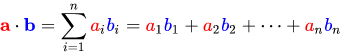
You can also take the dot product between a matrix x and a vector y, which returns
a vector where the coefficients are the dot products between y and the rows of x.

As navie:




```
import numpy as np
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z
```
In Numpy
```
def naive_matrix_vector_dot(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z
```
Note that as soon as one of the two tensors has an ndim greater than 1, dot is no longer symmetric, which is to say that dot(x, y) isn’t the same as dot(y, x).

More generally, you can take the dot product between higher-dimensional tensors,
following the same rules for shape compatibility as outlined earlier for the 2D case:
(a, b, c, d) . (d,) -> (a, b, c)
(a, b, c, d) . (d, e) -> (a, b, c, e)

4.   Tensor reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial
tensor. 
```
>>> x = np.array([[0., 1.],
                  [2., 3.],
                  [4., 5.]])
>>> print(x.shape)
(3, 2)
>>> x = x.reshape((6, 1))
>>> x
array([[ 0.],
      [ 1.],
      [ 2.],
      [ 3.],
      [ 4.],
      [ 5.]])
>>> x = x.reshape((2, 3))
>>> x
array([[ 0., 1., 2.],
      [ 3., 4., 5.]])
```





```
output = relu(dot(W, input) + b)
```
W and b are tensors that are attributes of the layer. They’re called
the weights or trainable parameters of the layer (the kernel and bias attributes, respectively)
Initially, these weight matrices are filled with small random values (a step called random initialization).What comes next is to gradually
adjust these weights, based on a feedback signal. This gradual adjustment, also called
training, is basically the learning that machine learning is all about.

training loop, which works as follows. Repeat
these steps in a loop, as long as necessary:
# Mini-batch stochastic gradient descent (minibatch SGD)
1.   Draw a batch of training samples x and corresponding targets y.
2.   Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3.   Compute the loss of the network on the batch, a measure of the mismatch
between y_pred and y.
4.   Compute the gradient of the loss with regard to the network’s parameters (a
backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for
example W -= step * gradient—thus reducing the loss on the batch a bit.

#Optimizers
There exist multiple variants of SGD that differ by taking into account
previous weight updates when computing the next weight update, rather than just
looking at the current value of the gradients.
There is, for instance, SGD with momentum. Such variants are known as optimization methods or optimizers. 

Momentum addresses two issues with
SGD: convergence speed and local minima.
Momentum is implemented by moving
the ball at each step based not only on the current slope value (current acceleration)
but also on the current velocity (resulting from past acceleration). In practice, this
means updating the parameter w based not only on the current gradient value but also
on the previous parameter update.


```
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
w, loss, gradient = get_current_parameters()
velocity = past_velocity * momentum + learning_rate * gradient
w = w + momentum * velocity - learning_rate * gradient
past_velocity = velocity
update_parameter(w)
```
#Backpropagation algorithm
In practice, a neural network function
consists of many tensor operations chained together, each of which has a simple,
known derivative. For instance, this is a network f composed of three tensor operations, a, b, and c, with weight matrices W1, W2, and W3:

f(W1, W2, W3) = a(W1, b(W2, c(W3)))
a chain of functions can be derived using the following identity, called the chain rule: f(g(x)) = f'(g(x)) * g'(x). Applying the chain rule to the
computation of the gradient values of a neural network gives rise to an algorithm called Backpropagation.

 Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter
had in the loss value.

Thanks to symbolic differentiation, you’ll
never have to implement the Backpropagation algorithm by hand


#**Summery**
This was the input data:


```
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
```
the input images are stored in Numpy tensors, which are
here formatted as float32 tensors of shape (60000, 784) (training data) and (10000,
784) (test data), respectively.

This was our network:


```
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
```
this network consists of a chain of two Dense layers, that
each layer applies a few simple tensor operations to the input data, and that these
operations involve weight tensors. Weight tensors, which are attributes of the layers,
are where the knowledge of the network persists.

This was the network-compilation step:


```
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
```
categorical_crossentropy is the loss function that’s used
as a feedback signal for learning the weight tensors, and which the training phase will
attempt to minimize. You also know that this reduction of the loss happens via minibatch stochastic gradient descent. The exact rules governing a specific use of gradient
descent are defined by the rmsprop optimizer passed as the first argument.

Finally, this was the training loop:


```
network.fit(train_images, train_labels, epochs=5, batch_size=128)
```
when you call fit: the network will start to iterate
on the training data in mini-batches of 128 samples, 5 times over (each iteration over
all the training data is called an epoch). At each iteration, the network will compute the
gradients of the weights with regard to the loss on the batch, and update the weights accordingly.


